## Titanic Dataset – Survival Pattern Analysis

In [95]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import seaborn for advanced and aesthetic visualizations
import seaborn as sns

# Display plots inline inside the notebook
%matplotlib inline

In [97]:
# Load the Titanic dataset from CSV file
df = pd.read_csv("titanic.csv")

# Display the first five rows of the dataset
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Basic Data Inspection

In [100]:
# Display the shape of the dataset (rows, columns)
df.shape

(1310, 14)

In [102]:
# Display column names
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [103]:
# Display dataset information including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [105]:
# Check for missing values in each column
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

### Data Cleaning
Handle Missing Values

# LOOK INTO THIS CHIDINMA

In [109]:
# Fill missing Age values with the median age
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing Embarked values with the most frequent value
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop the Cabin column because it has too many missing values
df.drop(columns=['cabin'], inplace=True)

# Verify that missing values have been handled
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
embarked        0
boat          824
body         1189
home.dest     565
dtype: int64

In [111]:
# Drop rows where critical columns are missing
df.dropna(subset=['survived', 'pclass', 'sex'], inplace=True)

# Check missing values again
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [113]:
# Drop columns with excessive missing values
df.drop(columns=['boat', 'body', 'home.dest'], inplace=True)

In [115]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,C
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0,1.0,0.0,2665,14.4542,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,C
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,S


###
- Rows with entirely missing values were removed.
- Columns with excessive missing data were dropped to maintain analytical clarity.

### Feature Engineering

In [60]:
# Create a new feature called FamilySize
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Display first few rows to confirm new column
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO",1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4.0


In [58]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### Exploratory Data Analysis (EDA)

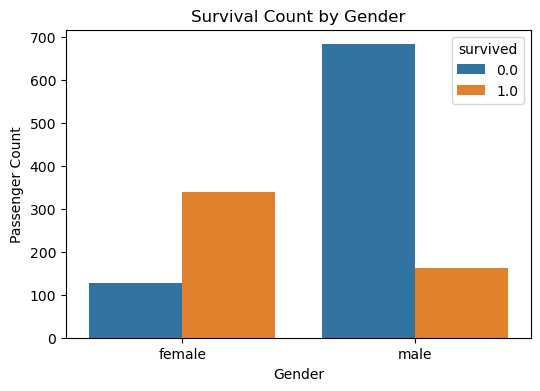

In [62]:
### Visualization 1: Survival Rate by Gender
# Set figure size
plt.figure(figsize=(6,4))

# Create a countplot to compare survival by gender
sns.countplot(data=df, x='sex', hue='survived')

# Add title
plt.title("Survival Count by Gender")

# Add x-axis label
plt.xlabel("Gender")

# Add y-axis label
plt.ylabel("Passenger Count")

# Display the plot
plt.show()

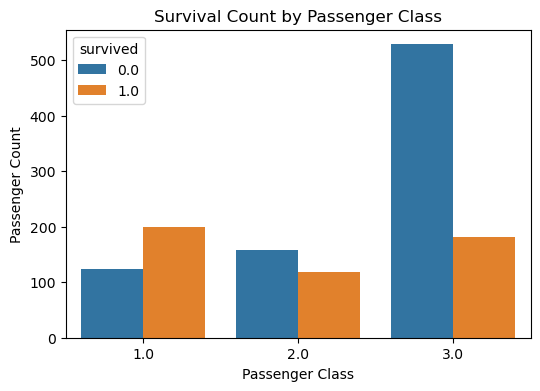

In [64]:
### Visualization 2: Survival Rate by Passenger Class
# Set figure size
plt.figure(figsize=(6,4))

# Create a countplot for survival by passenger class
sns.countplot(data=df, x='pclass', hue='survived')

# Add title
plt.title("Survival Count by Passenger Class")

# Add x-axis label
plt.xlabel("Passenger Class")

# Add y-axis label
plt.ylabel("Passenger Count")

# Display the plot
plt.show()

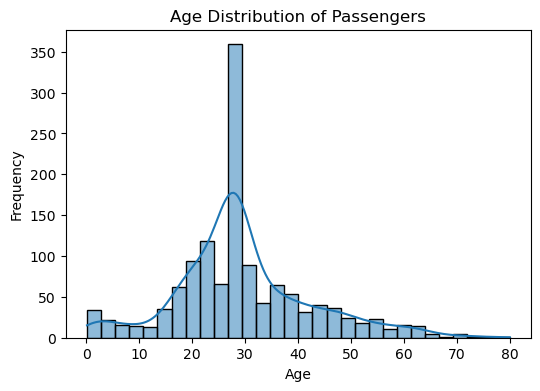

In [66]:
# Visualization 3: Age Distribution

# Set figure size
plt.figure(figsize=(6,4))

# Plot histogram of passenger ages
sns.histplot(df['age'], bins=30, kde=True)

# Add title
plt.title("Age Distribution of Passengers")

# Add x-axis label
plt.xlabel("Age")

# Add y-axis label
plt.ylabel("Frequency")

# Display plot
plt.show()

### Key Metrics

In [69]:
# Calculate overall survival rate
survival_rate = df['survived'].mean()

# Calculate survival rate by gender
survival_by_gender = df.groupby('sex')['survived'].mean()

# Calculate survival rate by passenger class
survival_by_class = df.groupby('pclass')['survived'].mean()

# Display calculated metrics
survival_rate, survival_by_gender, survival_by_class

(0.3819709702062643,
 sex
 female    0.727468
 male      0.190985
 Name: survived, dtype: float64,
 pclass
 1.0    0.619195
 2.0    0.429603
 3.0    0.255289
 Name: survived, dtype: float64)

### Actionable Insights
Insight 1: **Gender-Based Survival Disparity**

Female passengers exhibited significantly higher survival rates than male passengers, indicating a structured evacuation bias toward women. This suggests that emergency response protocols were influenced by demographic prioritization.

Insight 2: **Socioeconomic Survival Gap**

First-class passengers demonstrated substantially higher survival probability compared to second- and third-class passengers. This reveals a clear association between socioeconomic status and access to life-saving resources during evacuation.

Insight 3: **Age Influence on Survival Probability**

Younger passengers showed moderately higher survival outcomes compared to older age groups, indicating age-based prioritization during rescue efforts.

### Business Recommendations

1. Emergency preparedness frameworks should include predefined vulnerability criteria to ensure systematic and equitable evacuation prioritization.

2. Safety infrastructure and evacuation access points must be uniformly distributed across passenger classes to eliminate structural survival disparities.

3. Passenger demographic profiling should inform evacuation modeling and capacity planning to improve response efficiency during maritime emergencies.

### Save Visual Report

In [74]:
# Save survival by gender plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival Count by Gender")
plt.savefig("survival_by_gender.png")
plt.close()

# Save survival by class plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.savefig("survival_by_class.png")
plt.close()